In [1]:
import wrangle
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
import warnings
warnings.filterwarnings('ignore')



### Select a dataset with a continuous target variable.

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test)

In [4]:
train_scaled.head()

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,county_code,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
947232,1.0,0.75,0.388317,893004.0,0.870690,0.110976,6059.0,0,1,0
1559262,0.0,0.50,0.188951,260933.0,0.405172,0.026447,6059.0,0,1,0
770438,0.0,0.00,0.189064,167176.0,0.508621,0.017325,6037.0,1,0,0
245576,0.5,0.00,0.232311,738566.0,0.879310,0.070824,6059.0,0,1,0
1695674,0.0,0.00,0.241141,114067.0,0.500000,0.026221,6037.0,1,0,0


In [5]:
train.head()

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,county_code,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
947232,5.0,3.5,3432.0,893004.0,2001.0,13320.60,6059.0,0,1,0
1559262,3.0,3.0,1671.0,260933.0,1947.0,3187.08,6059.0,0,1,0
770438,3.0,2.0,1672.0,167176.0,1959.0,2093.45,6037.0,1,0,0
245576,4.0,2.0,2054.0,738566.0,2002.0,8507.10,6059.0,0,1,0
1695674,3.0,2.0,2132.0,114067.0,1958.0,3159.90,6037.0,1,0,0


In [6]:
print(f"""Train Shape: {train.shape}
Validate Shape: {validate.shape}
Test Shape: {test.shape}
""")

Train Shape: (832786, 10)
Validate Shape: (356909, 10)
Test Shape: (297424, 10)



#### ***Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.***

In [7]:
df = train

In [8]:
df = df.drop(columns = 'county_code')

In [9]:
df

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
947232,5.0,3.5,3432.0,893004.0,2001.0,13320.60,0,1,0
1559262,3.0,3.0,1671.0,260933.0,1947.0,3187.08,0,1,0
770438,3.0,2.0,1672.0,167176.0,1959.0,2093.45,1,0,0
245576,4.0,2.0,2054.0,738566.0,2002.0,8507.10,0,1,0
1695674,3.0,2.0,2132.0,114067.0,1958.0,3159.90,1,0,0
...,...,...,...,...,...,...,...,...,...
1035662,5.0,3.0,2308.0,656000.0,1959.0,8042.45,1,0,0
463244,3.0,2.0,1700.0,209048.0,1956.0,2411.70,0,0,1
1766269,4.0,2.5,2282.0,527044.0,1979.0,6149.84,0,0,1
324934,3.0,2.0,1711.0,485663.0,1962.0,6029.84,1,0,0


In [10]:
    target = 'tax_value'
    drop_col = 'county_code'
    
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train_scaled.drop(columns=[target, drop_col])
    y_train = train_scaled[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate_scaled.drop(columns=[target, drop_col])
    y_validate = validate_scaled[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test_scaled.drop(columns=[target, drop_col])
    y_test = test_scaled[target]

In [11]:

print(f"""Train Shape: {X_train.shape}
Validate Shape: {X_validate.shape}
Test Shape: {X_test.shape}
""")

Train Shape: (832786, 8)
Validate Shape: (356909, 8)
Test Shape: (297424, 8)



### Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

### baseline

In [12]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [13]:
value_pred_mean = y_train.tax_value.mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean

In [14]:
value_pred_median = y_train.tax_value.median()
y_train['value_pred_median'] = value_pred_median
y_validate['value_pred_median'] = value_pred_median

In [15]:
rmse_train_mu = mean_squared_error(y_train.tax_value, y_train.value_pred_mean) **.5

rmse_validate_mu = mean_squared_error(y_validate.tax_value, y_validate.value_pred_mean) **.5

print(f"""RMSE using Mean\nTrain/In-Sample: {round(rmse_train_mu, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")

RMSE using Mean
Train/In-Sample: 398875.82 
Validate/Out-of-Sample: 399708.06


In [16]:
df = pd.DataFrame(data=[
    {
        "model": "mean_baseline",
        "RMSE_train": rmse_train_mu,
        "RMSE_validate": rmse_validate_mu,
        "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_mean),
        "model difference": rmse_train_mu - rmse_validate_mu
                                          
    }
])


In [17]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,398875.822679,399708.062705,0.0,-832.240026


### LinearRegression (OLS)

In [18]:
# MAKE THE THING: create the model object
OLSmodel = LinearRegression()

#1. FIT THE THING: fit the model to training data

OLSmodel.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5

print(f"""RMSE for OLS
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for OLS
_____________________
Training/In-Sample: 69368.59396176499, 
Validation/Out-of-Sample:  71650.41999597834
Difference:  2281.826034213358


In [19]:
df = df.append({
    "model": "OLS",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_ols),
    "model difference": rmse_train - rmse_validate
                                          
}, ignore_index=True)


In [20]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,398875.822679,399708.062705,0.000000,-832.240026
1,OLS,69368.593962,71650.419996,0.967867,-2281.826034


### LassoLars

In [21]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha = 0.01)

#1. FIT THE THING: fit the model to training data

lars.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_lars'] = lars.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lars) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_lars'] = lars.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lars) ** .5

print(f"""RMSE for Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for Lars
_____________________
Training/In-Sample: 69368.16328658025, 
Validation/Out-of-Sample:  71650.28218975001
Difference:  2282.1189031697577


In [22]:
df = df.append({
    "model": "LassoLars",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_lars),
    "model difference": rmse_train - rmse_validate
                                          
}, ignore_index=True)


In [23]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,398875.822679,399708.062705,0.000000,-832.240026
1,OLS,69368.593962,71650.419996,0.967867,-2281.826034
2,LassoLars,69368.163287,71650.282190,0.967867,-2282.118903


### TweedieRegressor (GLM:Generalized Linear Model)

In [24]:
# MAKE THE THING: create the model object
glm = TweedieRegressor(power = .5, alpha = 0.2)

glm.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_glm'] = glm.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_glm) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_glm'] = glm.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_glm) ** .5

print(f"""RMSE for GLM
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for GLM
_____________________
Training/In-Sample: 284534.7151956699, 
Validation/Out-of-Sample:  273541.9514513485
Difference:  -10992.763744321419


In [25]:
df = df.append({
    "model": "GLM",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_glm),
    "model difference": rmse_train - rmse_validate
                                          
}, ignore_index=True)

In [26]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,398875.822679,399708.062705,0.000000,-832.240026
1,OLS,69368.593962,71650.419996,0.967867,-2281.826034
2,LassoLars,69368.163287,71650.282190,0.967867,-2282.118903
3,GLM,284534.715196,273541.951451,0.532221,10992.763744


### Polynomial Regression

In [27]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.tax_value)

# Make predictions on training set
y_train['value_pred_poly'] = poly_reg.predict(X_train_poly)
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_poly) ** 0.5

# Make predictions on validation set
y_validate['value_pred_poly'] = poly_reg.predict(X_validate_poly)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_poly) ** 0.5

# Print the RMSE results
print(f"""RMSE for Polynomial Regression
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample: {rmse_validate}
Difference: {rmse_validate - rmse_train}""")


RMSE for Polynomial Regression
_____________________
Training/In-Sample: 67036.76211782233,
Validation/Out-of-Sample: 69651.3997970986
Difference: 2614.6376792762603


In [28]:
df = df.append({
    "model": "POLY",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_poly),
    "model difference": rmse_train - rmse_validate
                                          
}, ignore_index=True)

In [29]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,398875.822679,399708.062705,0.000000,-832.240026
1,OLS,69368.593962,71650.419996,0.967867,-2281.826034
2,LassoLars,69368.163287,71650.282190,0.967867,-2282.118903
3,GLM,284534.715196,273541.951451,0.532221,10992.763744
4,POLY,67036.762118,69651.399797,0.969635,-2614.637679


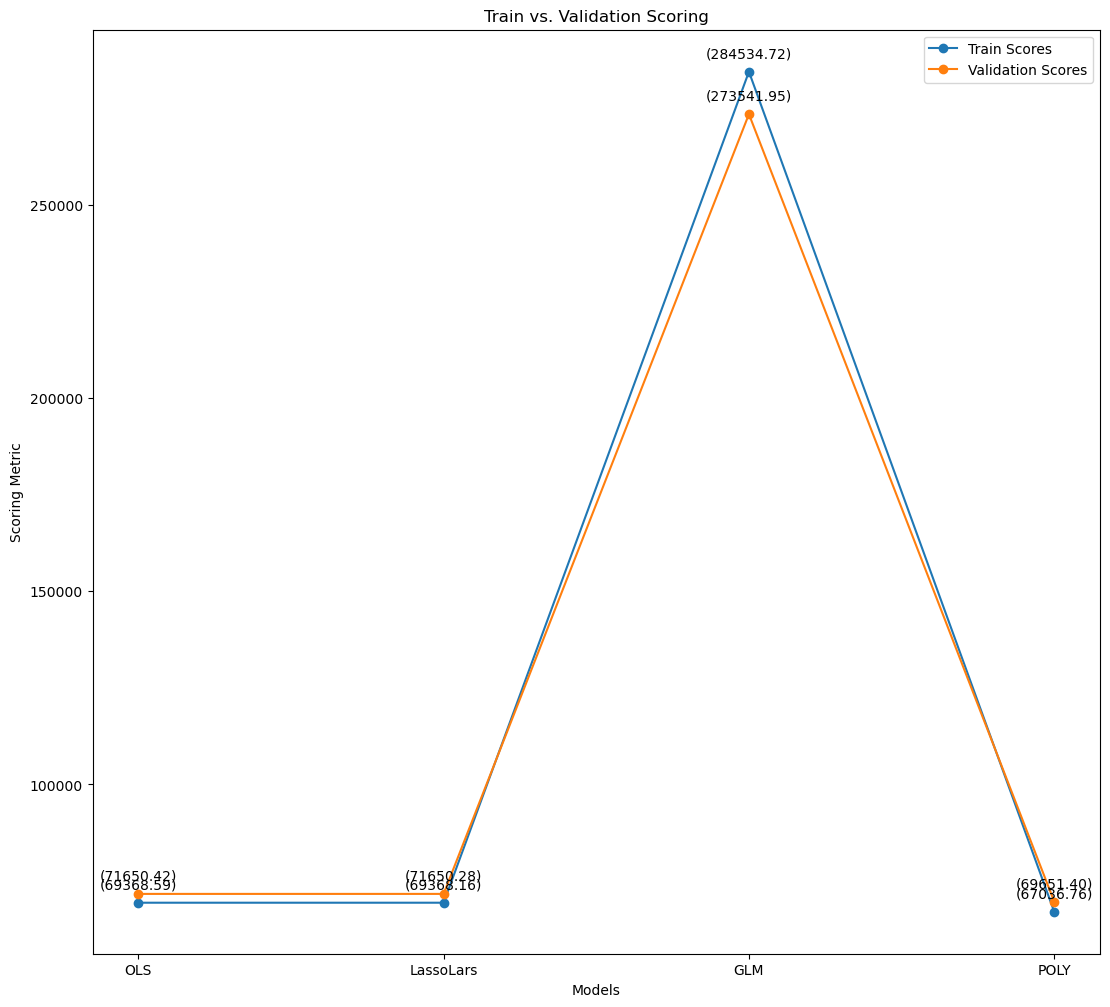

In [47]:

plt.figure(figsize= (13,12))
models = ['OLS', 'LassoLars', 'GLM','POLY']
train_scores = [69368.593962, 69368.163287,284534.715196, 67036.762118]
valid_scores = [71650.419996, 71650.282190,273541.951451,69651.399797]

plt.plot(models, train_scores, marker='o', label='Train Scores')
plt.plot(models, valid_scores, marker='o', label='Validation Scores')

plt.xlabel('Models')
plt.ylabel('Scoring Metric')
plt.title('Train vs. Validation Scoring')

for i, model in enumerate(models):
    plt.annotate(f"({train_scores[i]:.2f})", (model, train_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f"({valid_scores[i]:.2f})", (model, valid_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()

plt.show()


### Picking POLY as best performing model and running test on the model (due to best model difference and beating baseline test/val scoring

In [38]:
X_test_poly = poly.transform(X_test)

y_test_pred = poly_reg.predict(X_test_poly)

rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

print(f"RMSE on Test Set: {rmse_test}")



RMSE on Test Set: 81837.50928677643


### RMSE on POLY Test Set is 81837.51 which beats baselines RMSE train and RMSE validate by approximately 317,038 less in error